<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_19_Stacked_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [ ]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-23 01:17:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.5MB/s    in 2.6s    

2025-04-23 01:17:22 (57.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [ ]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_1237/912480700.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=False)
/tmp/ipykernel_1237/912480700.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_medians = df_cleaned.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


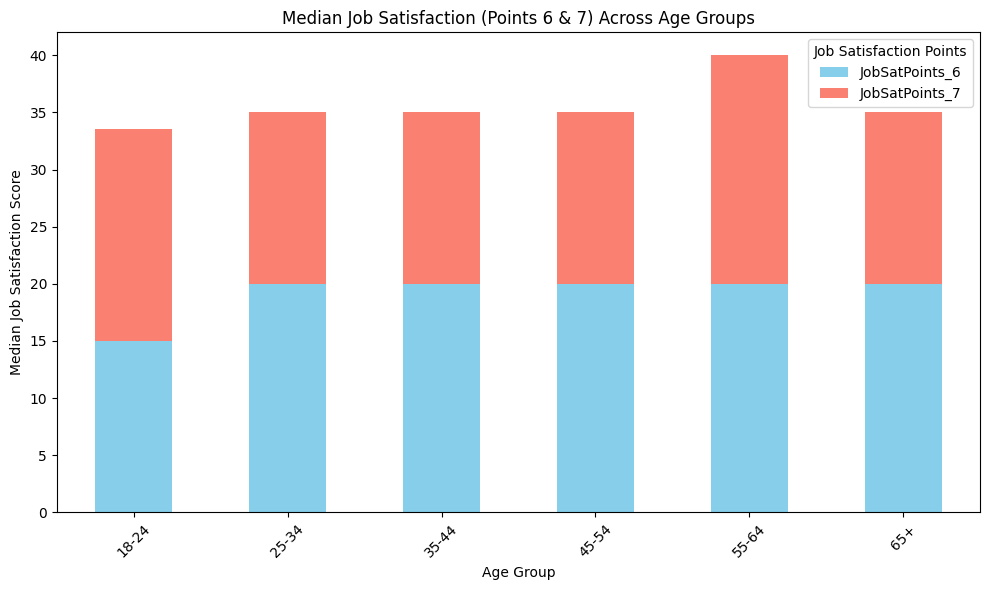

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in JobSatPoints_6, JobSatPoints_7, and Age columns
df_cleaned = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 4: Remove rows where 'Age_numeric' is NaN (e.g., 'Prefer not to say')
df_cleaned = df.dropna(subset=['Age_numeric'])

# Convert 'Age' to categorical or age groups (if it's numeric, e.g., 18-24, 25-34)
age_bins = [0, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age_numeric'], bins=age_bins, labels=age_labels, right=False)

# Calculate the median values of JobSatPoints_6 and JobSatPoints_7 for each Age group
age_group_medians = df_cleaned.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot the stacked bar chart
ax = age_group_medians.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Customize chart
plt.title('Median Job Satisfaction (Points 6 & 7) Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Points', labels=['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()

# Show the plot
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


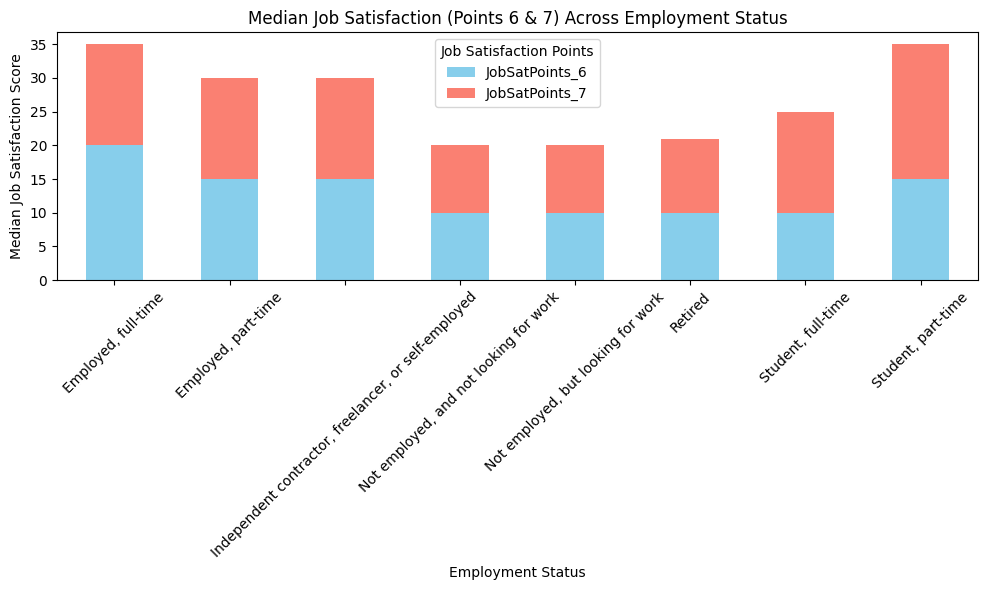

In [ ]:
df = df.assign(
    Employment_Types=df['Employment'].str.split(';')
).explode('Employment_Types')

# Drop missing values in JobSatPoints_6, JobSatPoints_7, and Employment columns
df_cleaned = df[['Employment_Types', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Calculate the median values of JobSatPoints_6 and JobSatPoints_7 for each Employment status
employment_medians = df_cleaned.groupby('Employment_Types')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot the stacked bar chart
ax = employment_medians.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Customize chart
plt.title('Median Job Satisfaction (Points 6 & 7) Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Points', labels=['JobSatPoints_6', 'JobSatPoints_7'])
plt.tight_layout()

# Show the plot
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [ ]:
df['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ...,  15637.,   9711., 116844.],
      shape=(6114,))

In [ ]:
df['JobSatPoints_6'].unique()

array([   nan,   0.  ,  25.  ,  30.  ,  60.  , 100.  ,  20.  ,  50.  ,
        15.  ,  10.  ,   5.  ,  80.  ,   8.  ,  65.  ,  90.  ,  75.  ,
        35.  ,  40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,
         9.  ,  21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,
        78.  ,  85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,
        81.  ,   6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,
        89.  ,  99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,
        88.  ,  29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,
        26.  ,  98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,
        43.  ,  69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,
        97.  ,  96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,
        51.  ,  48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

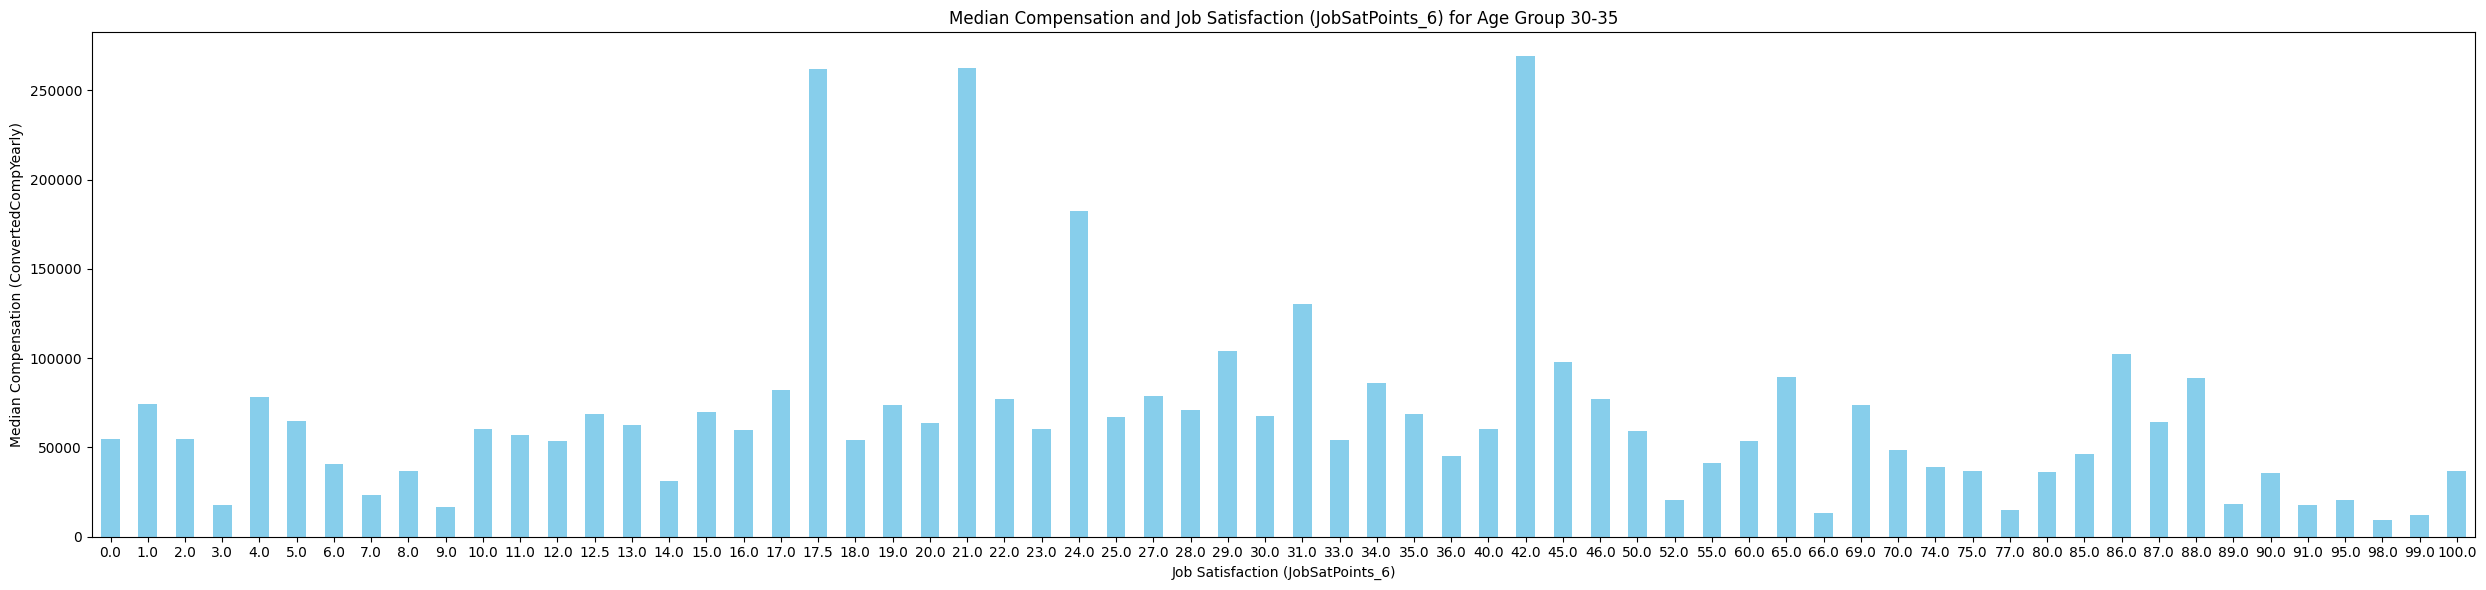

In [ ]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 4: Remove rows where 'Age_numeric' is NaN (e.g., 'Prefer not to say')
df_cleaned = df.dropna(subset=['Age_numeric'])
# Filter the data for respondents aged 30-35
df_filtered = df[(df['Age_numeric'] >= 30) & (df['Age_numeric'] <= 35)]

# Drop rows with missing values in 'JobSatPoints_6' and 'ConvertedCompYearly' columns
df_filtered_cleaned = df_filtered[['JobSatPoints_6', 'ConvertedCompYearly']].dropna()

# Group the data by 'JobSatPoints_6' and calculate the median compensation for each satisfaction level
compensation_by_satisfaction = df_filtered_cleaned.groupby('JobSatPoints_6')['ConvertedCompYearly'].median()
compensation_by_satisfaction
# Plot the stacked bar chart
ax = compensation_by_satisfaction.plot(kind='bar', stacked=True, figsize=(25, 6), color=['skyblue'])

# Customize chart
plt.title('Median Compensation and Job Satisfaction (JobSatPoints_6) for Age Group 30-35')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Median Compensation (ConvertedCompYearly)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_1237/1924070900.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned = df_cleaned.groupby('AgeGroup')[['ConvertedCompYearly','JobSatPoints_6']].median()
/tmp/ipykernel_1237/1924070900.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compensation_satisfaction_by_age = df_cleaned.groupby('AgeGroup').median()


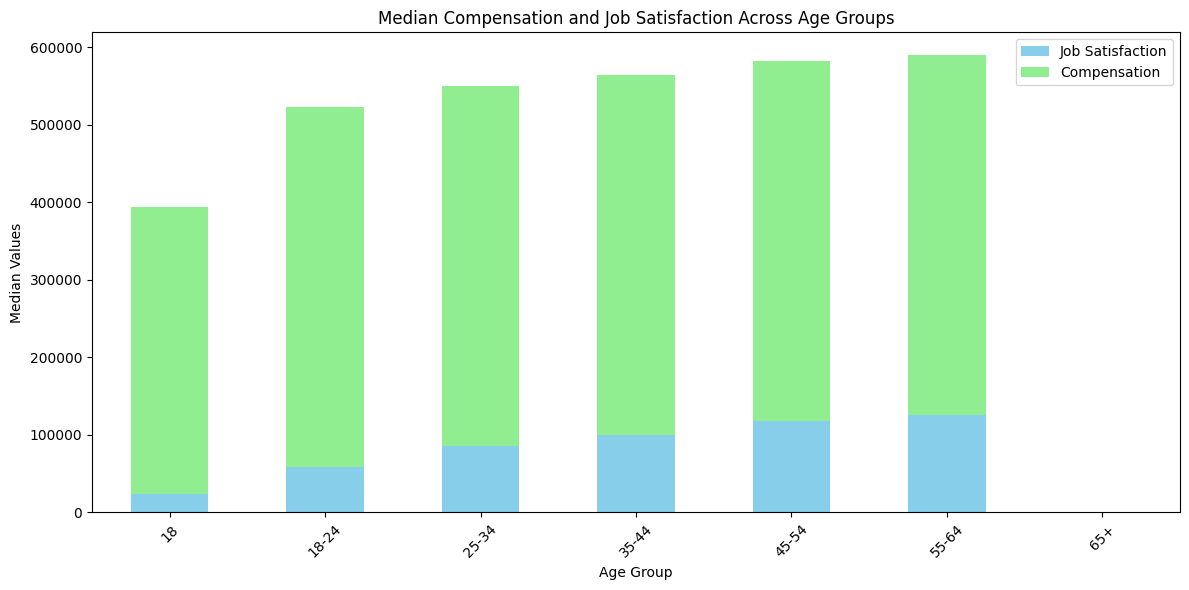

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Bin the ages into groups (e.g., 20-25, 26-30, 31-35, etc.)
age_bins = [16, 21, 30, 40, 50, 60, 70, 100]
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  # Handle 'Prefer not to say' if needed
}

df['Age_numeric'] = df['Age'].map(age_map)

# Step 4: Remove rows where 'Age_numeric' is NaN (e.g., 'Prefer not to say')
df_cleaned = df.dropna(subset=['Age_numeric'])

age_labels = ['18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=age_bins, labels=age_labels)

# Drop rows with missing values in 'ConvertedCompYearly' or 'JobSatPoints_6'
df_cleaned = df[['AgeGroup', 'JobSatPoints_6', 'ConvertedCompYearly']].dropna()
df_cleaned = df_cleaned.groupby('AgeGroup')[['ConvertedCompYearly','JobSatPoints_6']].median()
df_cleaned['JobSatPoints_6'] = df_cleaned['JobSatPoints_6'] * 23200.0

df_cleaned
# Group by 'AgeGroup' and calculate the median for compensation and job satisfaction
compensation_satisfaction_by_age = df_cleaned.groupby('AgeGroup').median()
compensation_satisfaction_by_age
# Plot the stacked bar chart
ax = df_cleaned.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue','lightgreen'])

# Customize the chart
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.xticks(rotation=45)
plt.legend(['Job Satisfaction', 'Compensation'])
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [ ]:
df.columns[df.columns.str.contains('Data')]
df['DatabaseWantToWorkWith'].unique()


array([nan, 'PostgreSQL', 'Firebase Realtime Database', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      shape=(8479,), dtype=object)

/tmp/ipykernel_1237/961705409.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_counts = df_db.groupby(['AgeGroup', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')


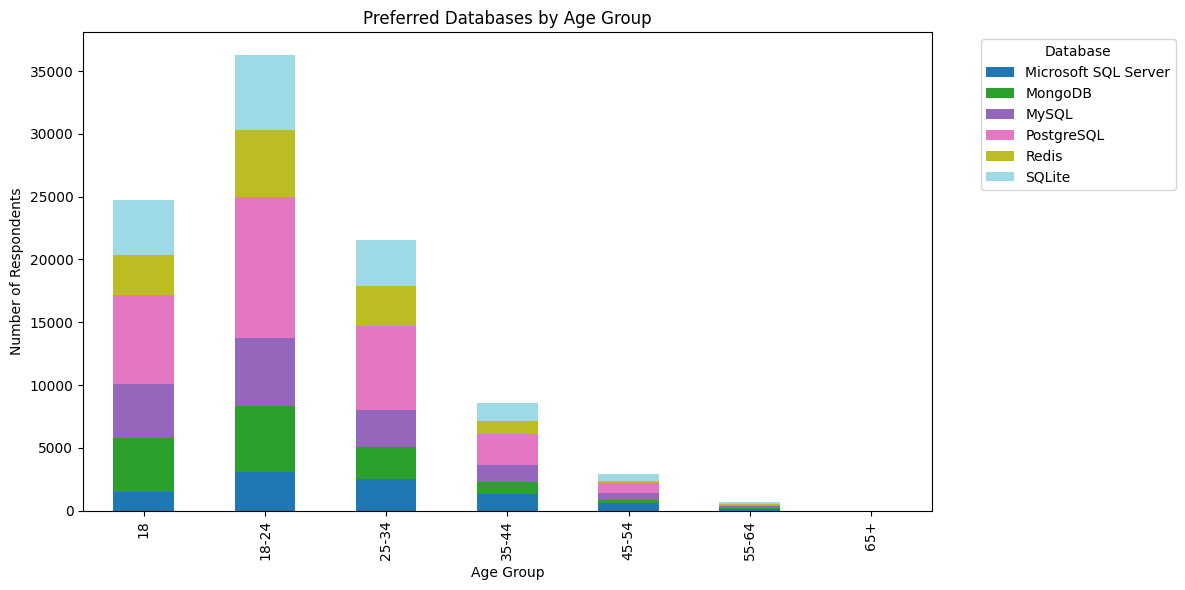

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop NaNs and split the values
df_db = df[['AgeGroup', 'DatabaseWantToWorkWith']].dropna()
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')

# Step 2: Explode so each database is a row
df_db = df_db.explode('DatabaseWantToWorkWith')

# Step 3: Count the number of responses per age group and database
db_counts = df_db.groupby(['AgeGroup', 'DatabaseWantToWorkWith']).size().reset_index(name='Count')

# Step 4: Get top N databases overall to filter
top_dbs = db_counts.groupby('DatabaseWantToWorkWith')['Count'].sum().nlargest(6).index
db_counts = db_counts[db_counts['DatabaseWantToWorkWith'].isin(top_dbs)]

# Step 5: Pivot for plotting
pivot_df = db_counts.pivot(index='AgeGroup', columns='DatabaseWantToWorkWith', values='Count').fillna(0)

# Step 6: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


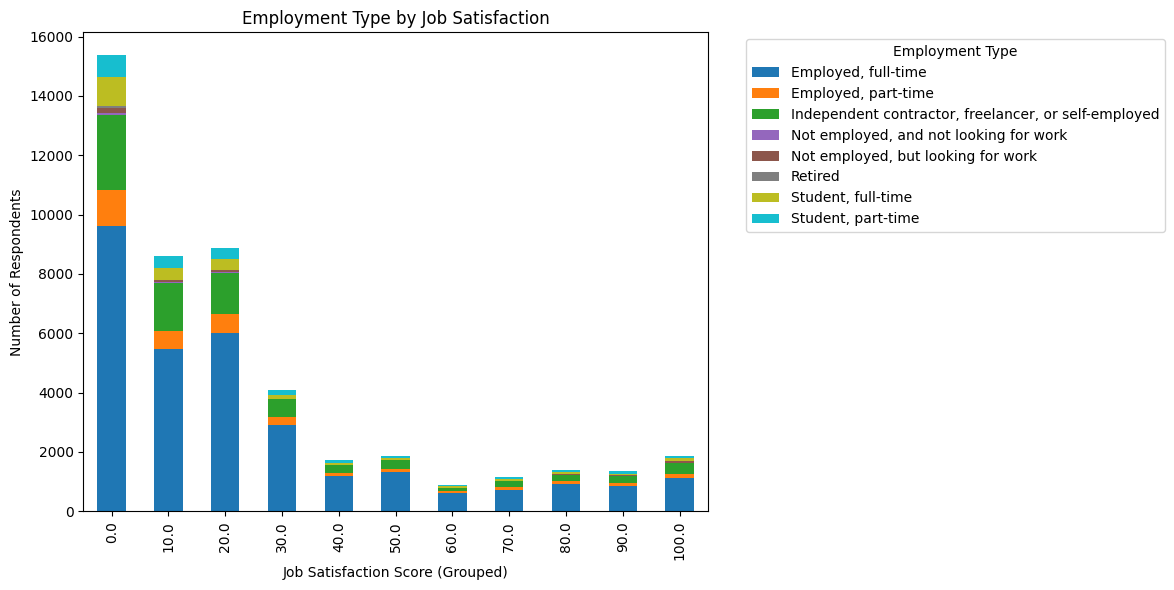

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter relevant columns and drop NaNs
df_emp = df[['Employment', 'JobSatPoints_6']].dropna()

# Optional: Round job satisfaction to nearest 10 for grouping
df_emp['JobSatGroup'] = (df_emp['JobSatPoints_6'] // 10) * 10
df_emp = df_emp.assign(
    Employment_Types=df_emp['Employment'].str.split(';')
).explode('Employment_Types')
# Step 2: Group and count
emp_satisfaction = df_emp.groupby(['JobSatGroup', 'Employment_Types']).size().reset_index(name='Count')

# Step 3: Pivot for stacked bar chart
pivot_df = emp_satisfaction.pivot(index='JobSatGroup', columns='Employment_Types', values='Count').fillna(0)

# Step 4: Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Employment Type by Job Satisfaction')
plt.xlabel('Job Satisfaction Score (Grouped)')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_1237/3376385451.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_agegroup = df_lang.groupby(['AgeGroup', 'LanguageAdmired']).size().reset_index(name='Count')


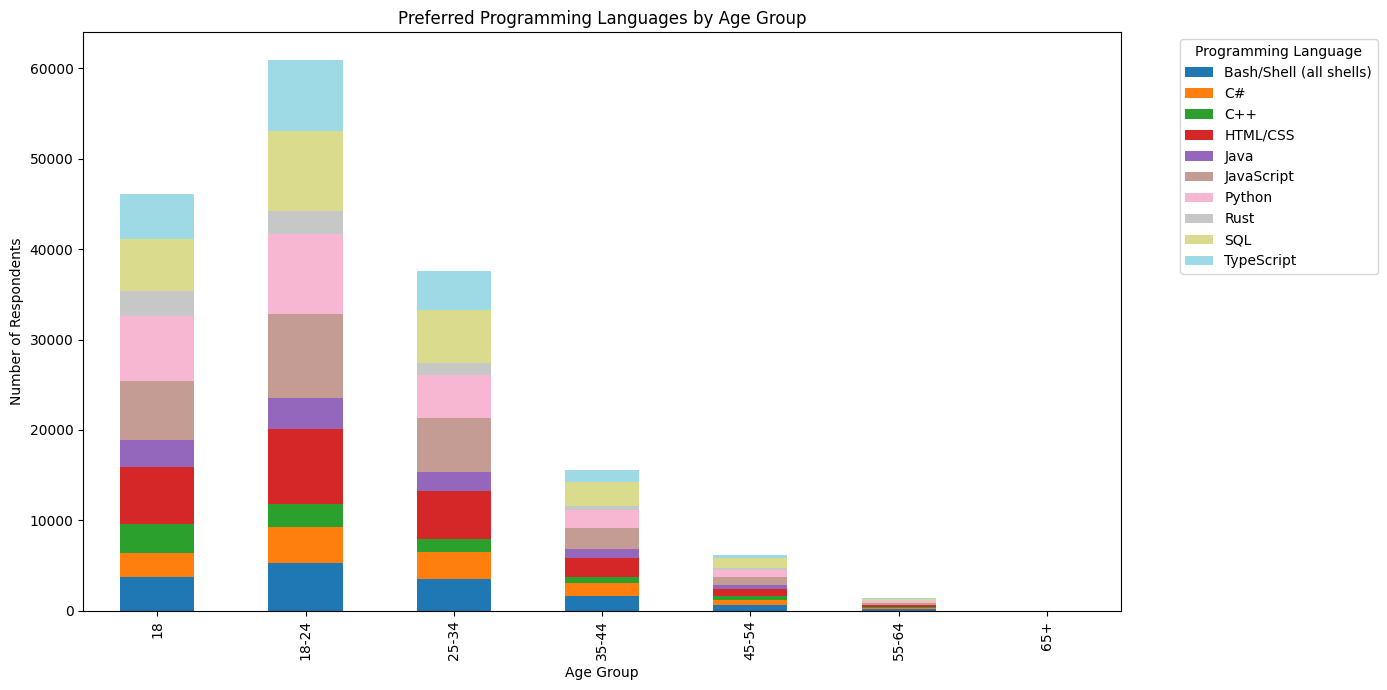

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select relevant columns and drop missing values
df_lang = df[['AgeGroup', 'LanguageAdmired']].dropna()

# Step 2: Split multiple languages into separate rows
df_lang = df_lang.assign(LanguageAdmired=df_lang['LanguageAdmired'].str.split(';')).explode('LanguageAdmired')

# Step 3: Group by AgeGroup and LanguageAdmired and count
lang_agegroup = df_lang.groupby(['AgeGroup', 'LanguageAdmired']).size().reset_index(name='Count')

# Step 4: Optional: Focus on top 5-10 admired languages overall
top_languages = lang_agegroup.groupby('LanguageAdmired')['Count'].sum().sort_values(ascending=False).head(10).index
lang_agegroup = lang_agegroup[lang_agegroup['LanguageAdmired'].isin(top_languages)]

# Step 5: Pivot the data for stacked chart
pivot_df = lang_agegroup.pivot(index='AgeGroup', columns='LanguageAdmired', values='Count').fillna(0)

# Step 6: Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


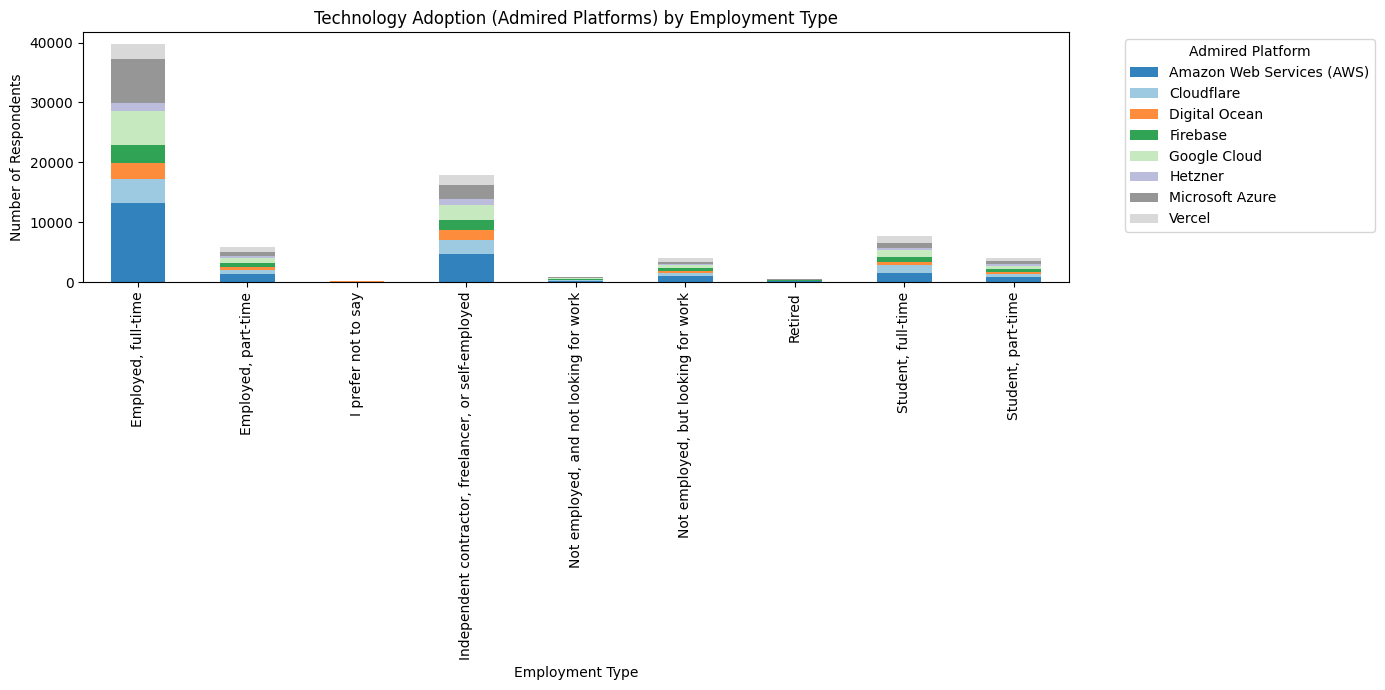

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter necessary columns and remove missing values
df_platform = df[['Employment', 'PlatformAdmired']].dropna()

# Step 2: Split multiple admired platforms into separate rows
df_platform = df_platform.assign(PlatformAdmired=df_platform['PlatformAdmired'].str.split(';')).explode('PlatformAdmired')
df_platform = df_platform.assign(
    Employment_Types=df_platform['Employment'].str.split(';')
).explode('Employment_Types')
# Step 3: Group by Employment and PlatformAdmired
platform_employment = df_platform.groupby(['Employment_Types', 'PlatformAdmired']).size().reset_index(name='Count')

# Step 4: Optionally filter top platforms across all employment types
top_platforms = platform_employment.groupby('PlatformAdmired')['Count'].sum().sort_values(ascending=False).head(8).index
platform_employment = platform_employment[platform_employment['PlatformAdmired'].isin(top_platforms)]

# Step 5: Pivot the data for plotting
pivot_platform = platform_employment.pivot(index='Employment_Types', columns='PlatformAdmired', values='Count').fillna(0)

# Step 6: Plot the stacked bar chart
pivot_platform.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20c')
plt.title('Technology Adoption (Admired Platforms) by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Admired Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
